<a href="https://colab.research.google.com/github/TrombBone/TelecomLabs/blob/main/telecomLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведем импорт необходимых библиотек и файлов.

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Spectrum, Wave, Noise
from thinkdsp import decorate, read_wave, unbias, normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Упражнение 4.1**

На сайте Soft Murmur можно послушать множество природных источников шума, включая дождь, волны, ветер и др. На веб-странице [http://asoftmurmur.com/about/](http://asoftmurmur.com/about/) приведен перечень записей; большинство из них хранится на [http://freesound.org](http://freesound.org).

Скачайте некоторые из этих файлов и вычислите спектры каждого сигнала. Похож ли их спектр мощности на белый, розовый или броуновский шум? Как спектр меняется во времени?


К сожалению, на предложенном сайте звуки либо весят больше 25мб, что не позволяет их загрузить на гитхаб, либо имеют формат на .waw, что не позволяет их обрабоать, а все подходящие звуки представляют собой тибетскую чашу, а хотелось разных звуков. Поэтому я просто нашёл на freesound.org похожие звуки природы, которые подходили под мои нужды. 

In [ ]:
if not os.path.exists('670682__oldmansmusic__arctic-wind.wav'):
  !wget https://github.com/TrombBone/TelecomLabs/raw/main/670682__oldmansmusic__arctic-wind.wav

if not os.path.exists('531947__straget__the-rain-falls-against-the-parasol.wav'):
  !wget https://github.com/TrombBone/TelecomLabs/raw/main/531947__straget__the-rain-falls-against-the-parasol.wav

if not os.path.exists('164661__deleted_user_2104797__fire.wav'):
  !wget https://github.com/TrombBone/TelecomLabs/raw/main/164661__deleted_user_2104797__fire.wav

Выбрал три звука: арктического ветра, дождя и огня. Послушаем часть звука и проанализируем их спектры:

In [ ]:
wind_segment = read_wave('670682__oldmansmusic__arctic-wind.wav').segment(start=2.0, duration=1.0)
wind_segment.make_audio()

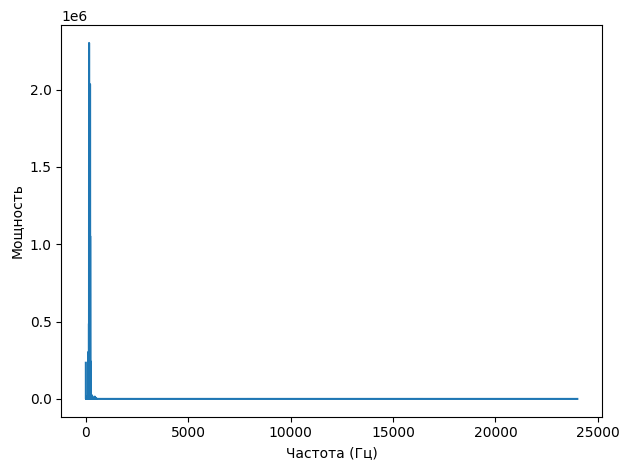

In [ ]:
wind_spectrum = wind_segment.make_spectrum()
wind_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

По графику видно, что амплитуда падает с увеличением частоты, что означает, что это красный или розовый шум. Чтобы понять более конкретно, необходимо распечатать спектр мощности в логарифмической шкале:

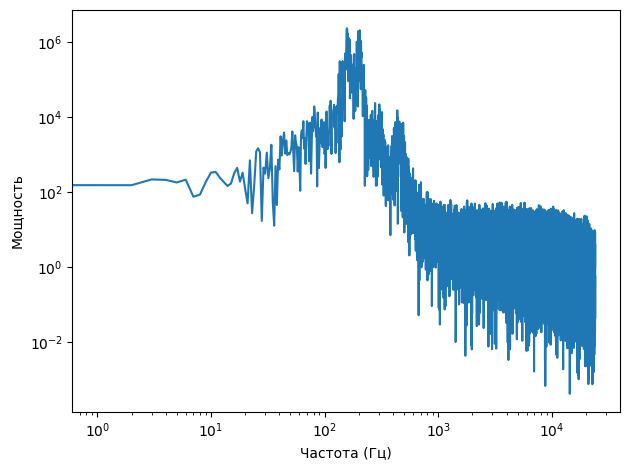

In [ ]:
wind_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [ ]:
wind_spectrum.estimate_slope().slope

-1.0403151698887194

Глядя на данный график сложно сказать, к какому шуму можно отнести данный шум, поскольку к частоте $10^2$ наблюдается рост мощности, а потом довольно резкий спад. Ближе всего график к розвому шуму. Попробуем взглянуть на другую часть этого звука, взяв другой сегмент.

In [ ]:
wind_segment2 = read_wave('670682__oldmansmusic__arctic-wind.wav').segment(start=6.0, duration=1.0)
wind_segment2.make_audio()

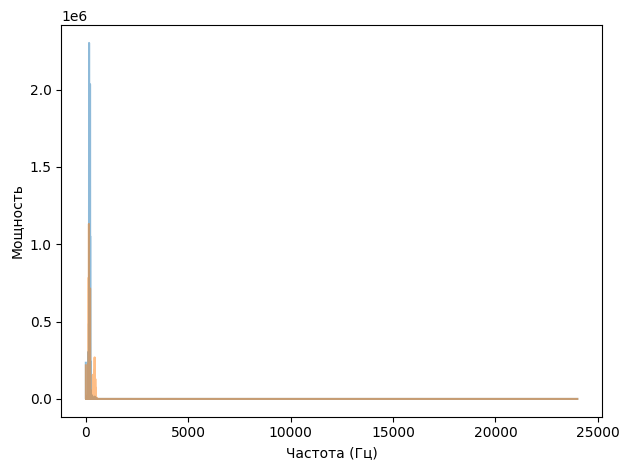

In [ ]:
wind_spectrum2 = wind_segment2.make_spectrum()
wind_spectrum.plot_power(alpha=0.5)
wind_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

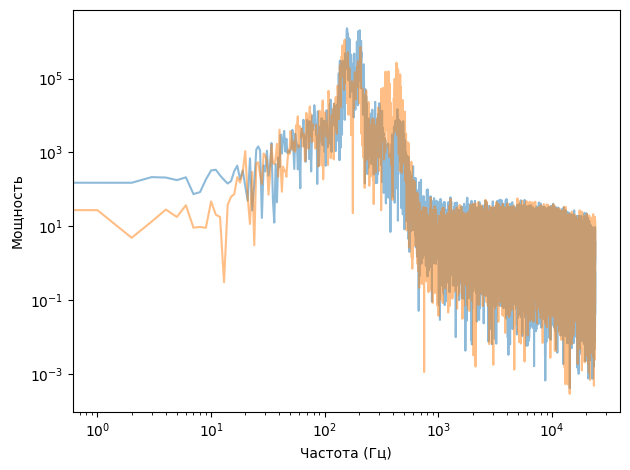

In [ ]:
wind_spectrum.plot_power(alpha=0.5)
wind_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [ ]:
wind_spectrum2.estimate_slope().slope

-0.9536462047930004

Как мы можем заметить, структура спектра не притерпивает сильных изменений.

Теперь рассмотрим звук дождя. Сразу будем рассматривать 2 сегмента звука, чтобы иметь более полное представление и сразу в логарифмическом формате. Но перед этим обязательно послучаем эти 2 сегмента:

In [ ]:
rain_segment = read_wave('531947__straget__the-rain-falls-against-the-parasol.wav').segment(start=2.0, duration=1.0)
rain_segment.make_audio()

In [ ]:
rain_segment2 = read_wave('531947__straget__the-rain-falls-against-the-parasol.wav').segment(start=6.0, duration=1.0)
rain_segment2.make_audio()

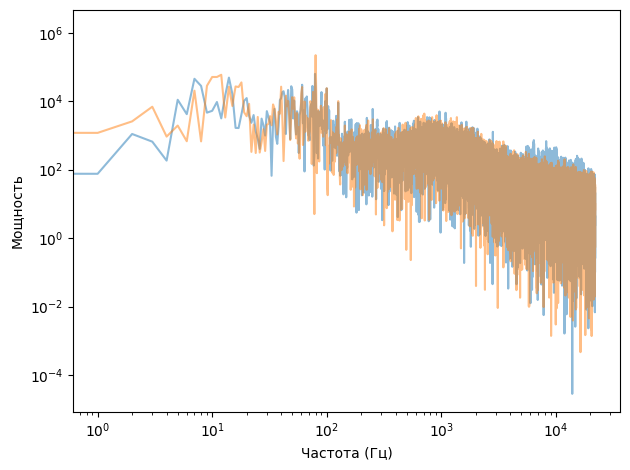

In [ ]:
rain_spectrum = rain_segment.make_spectrum()
rain_spectrum2 = rain_segment2.make_spectrum()
rain_spectrum.plot_power(alpha=0.5)
rain_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [ ]:
rain_spectrum.estimate_slope().slope

-0.9845584974206247

In [ ]:
rain_spectrum2.estimate_slope().slope

-1.1273752390783047

Судя по графику, можно с большой вероятностью сказать, что это белый шум, но ближе к розовому.

Наконец, перейдём к последнему звуку - звуку костра:

In [ ]:
fire_segment = read_wave('164661__deleted_user_2104797__fire.wav').segment(start=2.0, duration=1.0)
fire_segment.make_audio()

In [ ]:
fire_segment2 = read_wave('164661__deleted_user_2104797__fire.wav').segment(start=6.0, duration=1.0)
fire_segment2.make_audio()

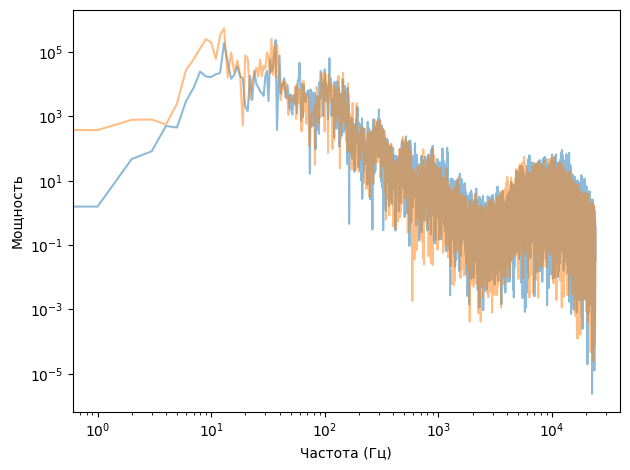

In [ ]:
fire_spectrum = fire_segment.make_spectrum()
fire_spectrum2 = fire_segment2.make_spectrum()
fire_spectrum.plot_power(alpha=0.5)
fire_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [ ]:
fire_spectrum.estimate_slope().slope

-0.7128915116930031

In [ ]:
fire_spectrum2.estimate_slope().slope

-0.8376110420347215

В данном случае также сложно понять, к какому шуму ближе этот график. Всю середину он очень напоминает красный шум, но начало и конец графика полностью противоречат этому. Спектр также не меняется в обоих сегментах.

# **Упражнение 4.2**

В шумовом сигнале частотный состав меняется во времени. На большом интервале мощность на всех частотах одинакова, а на коротком мощность на каждой частоте случайна.

Для оценки долговременной средней мощности на каждой частоте можно разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента, а затем найти среднее по сегментам.

Реализуйте метод Бартлетта и используйте его для оценки спектра мощности шумового сигнала. Подсказка: посмотрите на реализацию `make_spectrogram`.

Код метода Бартлетта представлен ниже

In [ ]:
def bartlett_method(wave, seg_length=512, win_flag=True):
  spectrum = wave.make_spectrogram(seg_length, win_flag)
  segments = spectrum.spec_map.values()

  power_segments = []
  for segment in segments:
    power_segments.append(segment.power)
  
  hs = np.sqrt(sum(power_segments)/len(power_segments))
  fs = next(iter(segments)).fs

  spectrum = Spectrum(hs, fs, wave.framerate)
  return spectrum

Исследуем работу алгоритма на используемых выше сегментах.

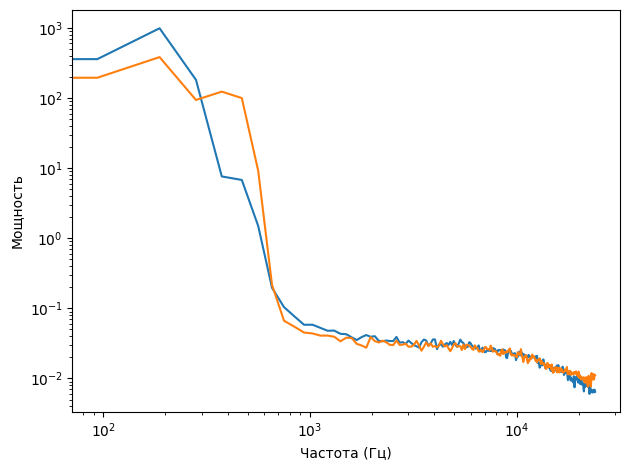

In [ ]:
wind_res = bartlett_method(wind_segment)
wind_res2 = bartlett_method(wind_segment2)

rain_res = bartlett_method(rain_segment)
rain_res2 = bartlett_method(rain_segment2)

fire_res = bartlett_method(fire_segment)
fire_res2 = bartlett_method(fire_segment2)

wind_res.plot_power()
wind_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

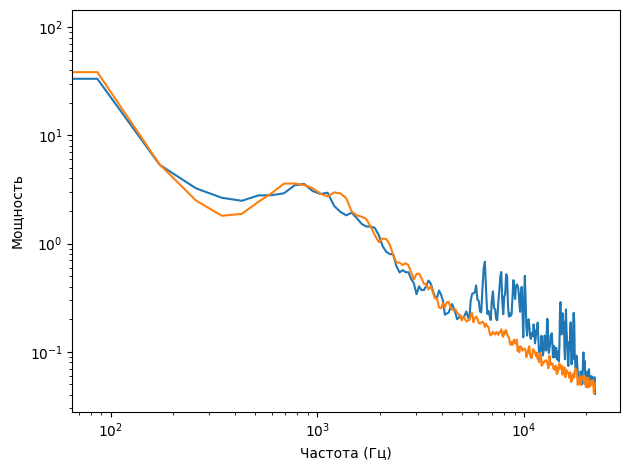

In [ ]:
rain_res.plot_power()
rain_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

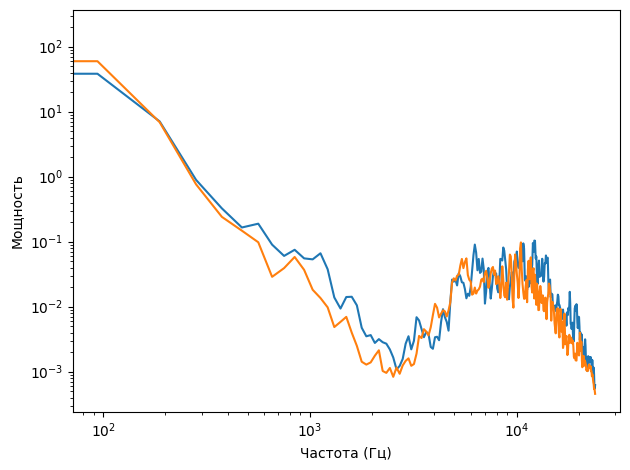

In [ ]:
fire_res.plot_power()
fire_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

С помощью данного метод мы можем наглядно видеть зависимость между частотами и мощностью. 

На основе новых графиков можно заметить, что предположение о том, что звук дождя - белый или розовый шум, неверно, они имеют более сложную структуру, может даже ближе к красному, поэтому однозначно точно сказать нельзя. Звук ветра остаётся очень сложным к определению, а звук костра - ещё более неклассифицируемым.

# **Упражнение 4.3**

На веб-странице [http://www.coindesk.com/price](http://www.coindesk.com/price) можно скачать в ввиде CSV-файла исторические данные о ежедневной цене BitCoin. Откройте этот файл и вычислите спектр цен BitCoin как функцию времени. Похоже ли это на белый, розовый или броуновский шум?

In [ ]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
  !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

Мною были скачаны данные за 2013-2020 года

In [ ]:
col_names = ["Closing Price (USD)", "Timestamp"]
data = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', parse_dates=[0])
data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


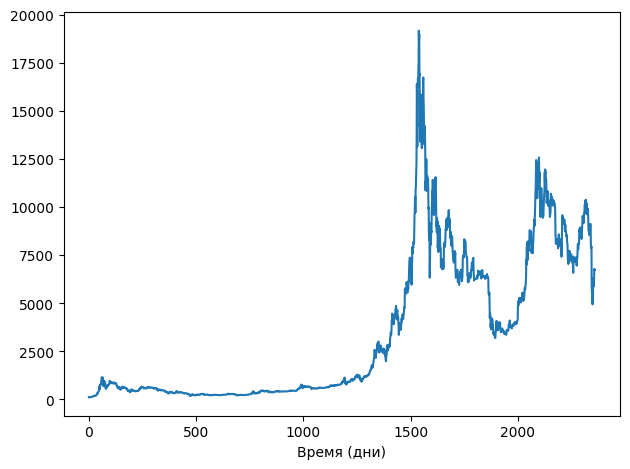

In [ ]:
btc_wave = Wave(data['Closing Price (USD)'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Время (дни)')

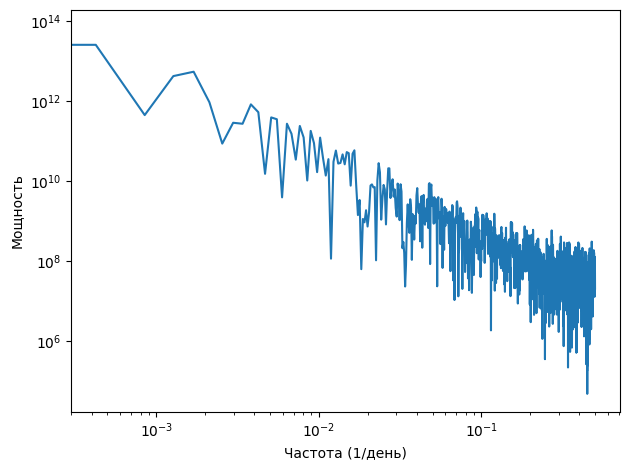

In [ ]:
btc_spectrum = btc_wave.make_spectrum()
btc_spectrum.plot_power()
decorate(xlabel='Частота (1/день)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [ ]:
btc_spectrum.estimate_slope().slope

-1.7332540936758951

Имеем наклон примерно -1.8. Это близко к Броуновскому шуму.

# **Упражнение 4.4**

Счетчик Гейгера - прибор для обнаружения радиации. Когда ионизирующи частицы попадают в детектор, на его выходе появляются импульсы тока. Общий выход в определенный момент времени можно смоделировать некоррелированным пуассоновым шумом (UP), где каждая выборка есть случайное число из распределения Пуассона, соответствующее количеству частиц, обнаруженных за интервал измерения.

Напишите класс, называемый `UncorrelatedPoissonNoise`, наследующий `thinkdsp._Noise` и предоставляющий `evaluate`. Следует использовать `Np.random.poisson` для генерации случайный величин из распределения Пуассона. Параметр этой функции `lam` - это среднее число частиц за время каждого интервала. Можно использовать атрибут `amp` для определения `lam`. Например, при чатоте кадров 10 кГц и `amp` 0,001 получится около 10 "щелчков" в секунду.

Сгенерируйте пару секунд UP и прослушайте. Для малых значений *amp*, например 0,001, звук будет как у счетчика Гейгера. При больших значениях он будет похож на белый шум. Вычислите и напечатайте спектр мощности и посмотрите, так ли это.


In [ ]:
class UncorrelatedPoissonNoise(Noise):

  def evaluate(self, ts):
    ys = np.random.poisson(self.amp, len(ts))
    return ys

Как и предлагается в задании, сгенерируем данный шум для малых и больших значениях `amp` и посмотрим, сопоставимы ли звуки с ожидаемыми.

In [ ]:
like_geiger_signal = UncorrelatedPoissonNoise(amp=0.001)
like_geiger_wave = like_geiger_signal.make_wave(duration=2.0, framerate=10000)
like_white_noise_signal = UncorrelatedPoissonNoise(amp=1)
like_white_noise_wave = like_white_noise_signal.make_wave(duration=2.0, framerate=10000)

like_geiger_wave.make_audio()

In [ ]:
like_white_noise_wave.make_audio()

Если прослушать звуки, то в первом случае услышим что-то похоже на трещание счётчика Гейгера, а во втором только шум.

Сравним графики и спектры сигналов:

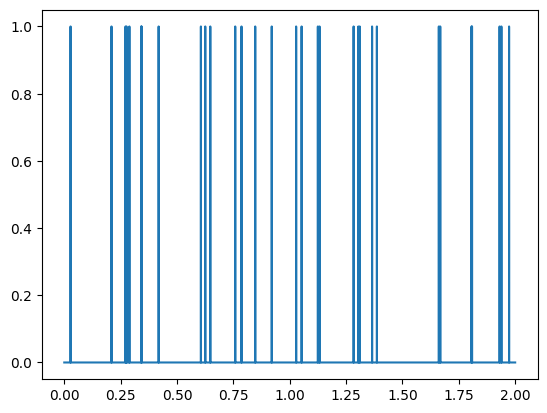

In [ ]:
like_geiger_wave.plot()

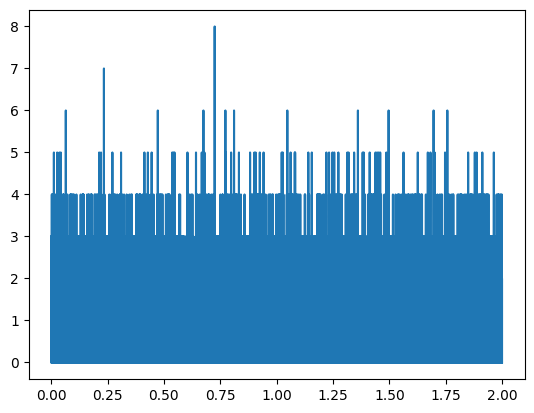

In [ ]:
like_white_noise_wave.plot()

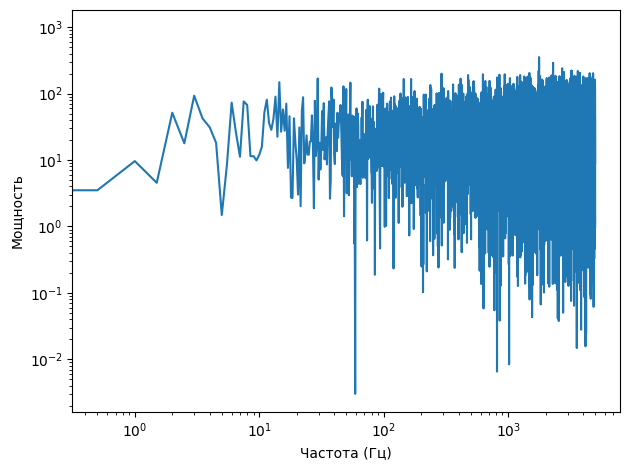

In [ ]:
like_geiger_spectrum = like_geiger_wave.make_spectrum()
like_geiger_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [ ]:
like_geiger_spectrum.estimate_slope().slope

-0.00587954913042687

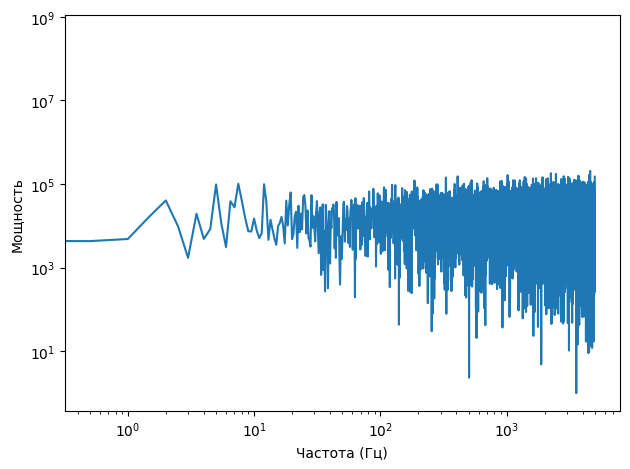

In [ ]:
like_white_noise_spectrum = like_white_noise_wave.make_spectrum()
like_white_noise_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [ ]:
like_white_noise_spectrum.estimate_slope().slope

0.006399026261769646

Как мы видим из полученных данных оба сигнала имеют уклон ~0, в связи с чем их можно считать белым шумом.

# **Упражнение 4.5**

В этой главе алгоритм для генерации розового шума концептуально простой, но затратный. Существет более эффективные варианты, например алгоритм *Voss-McCartney*. Изучите этот способ, реализуйте его, вычислите спектр результата и убедитесь, что соотношения между мощностью и частотой соответсвующие.


In [ ]:
def voss_pink_noise(rows, columns=16):
  array = np.empty((rows, columns))
  array.fill(np.nan)
  array[0, :] = np.random.random(columns)
  array[:, 0] = np.random.random(rows)

  cols = np.random.geometric(0.5, rows)
  cols[cols >= columns] = 0
  new_rows = np.random.randint(rows, size=rows)
  array[new_rows, cols] = np.random.random(rows)

  data = pd.DataFrame(array)
  data.fillna(method='ffill', axis=0, inplace=True)
  total = data.sum(axis=1)

  return total.values

Проверим его на примере с 12000 значениями

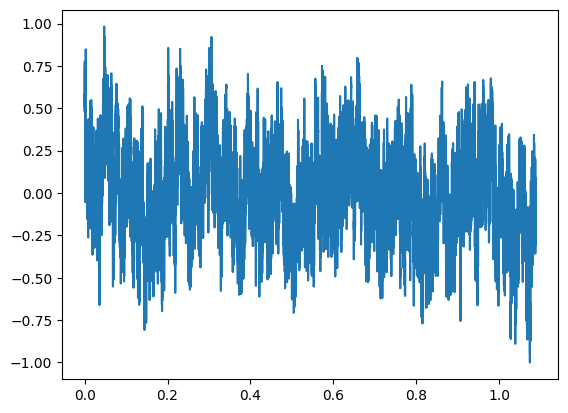

In [ ]:
ys = voss_pink_noise(12000)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

In [ ]:
wave.make_audio()

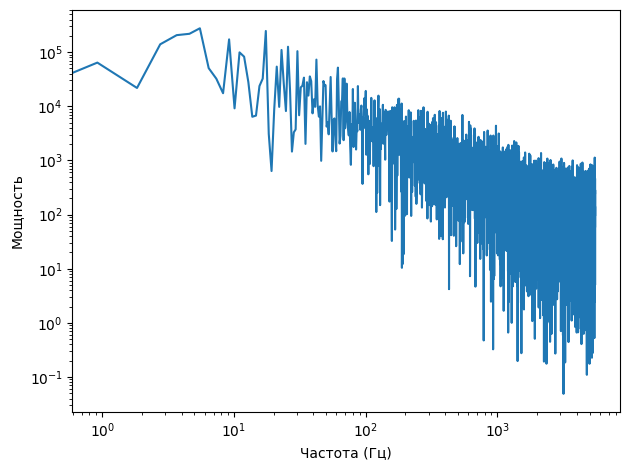

In [ ]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [ ]:
spectrum.estimate_slope().slope

-0.9927904141135422

Как мы видим уклон равен -1, а это значит, что действительно получился розовый шум.